In [1]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload
import xarray as xr
import pandas as pd 
import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)


<module 'pipvis' from '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pipvis.py'>

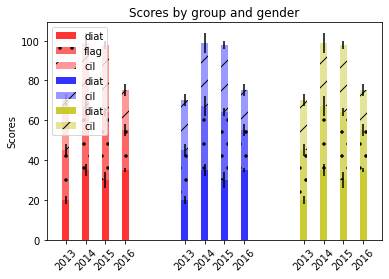

In [2]:

diat_means = np.array([20, 35, 30, 35])
flag_means = np.array([25, 32, 34, 20])
cil_means = np.array([25, 32, 34, 20])
men_std = [2, 3, 4, 1]
women_std = [3, 5, 2, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

x = np.arange(4)

fig, ax = plt.subplots()

ax.bar(x, diat_means, width, yerr=men_std, label='diat',color = 'r', alpha = 0.8)
ax.bar(x, flag_means, width, yerr=women_std, bottom=diat_means,
       label='flag', color = 'r', hatch='.', alpha = 0.6)
ax.bar(x, cil_means, width, yerr=women_std, bottom=flag_means+diat_means, color = 'r', alpha = 0.4, 
       hatch = '/', label='cil')

ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['2013','2014','2015','2016'])


x2 = np.array([6,7,8,9])

ax.bar(x2, diat_means, width, yerr=men_std, label='diat', color = 'b', alpha = 0.8)
ax.bar(x2, flag_means, width, yerr=women_std, bottom=diat_means,
      color = 'b', hatch='.', alpha = 0.6)
ax.bar(x2, cil_means, width, yerr=women_std, bottom=flag_means+diat_means, alpha = 0.4, color = 'b',
       hatch = '/', label='cil')


x3 = np.array([12,13,14,15])

ax.bar(x3, diat_means, width, yerr=men_std, label='diat', color = 'y', alpha = 0.8)
ax.bar(x3, flag_means, width, yerr=women_std, bottom=diat_means,
      color = 'y', hatch='.', alpha = 0.6)
ax.bar(x3, cil_means, width, yerr=women_std, bottom=flag_means+diat_means, alpha = 0.4, color = 'y',
       hatch = '/', label='cil')



ax.set_xticks([0,1,2,3,6,7,8,9,12,13,14,15])
ax.set_xticklabels(['2013','2014','2015','2016','2013','2014','2015','2016','2013','2014','2015','2016'],rotation = 45)


ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [3]:
w = xr.open_dataset('./clncs/Diatom_cluster_SSC201905_2013-2016.nc')
#print(w['CLID'])


FY_diat_CSoG = np.zeros(4)
for i in range(0,4):
    FY_diat_CSoG[i] = w['diatoms'][0][i][2][0].values

FY_diat_NSoG = np.zeros(4)
for i in range(0,4):
    FY_diat_NSoG[i] = w['diatoms'][0][i][3][0].values
    
FY_diat_JdF = np.zeros(4)
for i in range(0,4):
    FY_diat_JdF[i] = w['diatoms'][0][i][3][0].values
    
w = xr.open_dataset('./clncs/Flagellate_cluster_SSC201905_2013-2016.nc')

FY_flag_CSoG = np.zeros(4)
for i in range(0,4):
    FY_flag_CSoG[i] = w['flagellates'][0][i][2][0].values

FY_flag_NSoG = np.zeros(4)
for i in range(0,4):
    FY_flag_NSoG[i] = w['flagellates'][0][i][3][0].values
    
FY_flag_JdF = np.zeros(4)
for i in range(0,4):
    FY_flag_JdF[i] = w['flagellates'][0][i][3][0].values
    
w = xr.open_dataset('./clncs/TotBiomass_cluster_SSC201905_2013-2016.nc')

FY_tot_CSoG = np.zeros(4)
for i in range(0,4):
    FY_tot_CSoG[i] = w['totalbiomass'][0][i][2][0].values

FY_tot_NSoG = np.zeros(4)
for i in range(0,4):
    FY_tot_NSoG[i] = w['totalbiomass'][0][i][3][0].values
    
FY_tot_JdF = np.zeros(4)
for i in range(0,4):
    FY_tot_JdF[i] = w['totalbiomass'][0][i][3][0].values
    
    
FY_cil_JdF = FY_tot_JdF - FY_diat_JdF - FY_flag_JdF
FY_cil_NSoG = FY_tot_NSoG - FY_diat_NSoG - FY_flag_NSoG
FY_cil_CSoG = FY_tot_CSoG - FY_diat_CSoG - FY_flag_CSoG

In [4]:
w = xr.open_dataset('./clncs/Diatom_cluster_SSC201905_2013-2016.nc')
#print(w['CLID'])


SPR_diat_CSoG = np.zeros(4)
for i in range(0,4):
    SPR_diat_CSoG[i] = w['diatoms'][1][i][2][0].values

SPR_diat_NSoG = np.zeros(4)
for i in range(0,4):
    SPR_diat_NSoG[i] = w['diatoms'][1][i][3][0].values
    
SPR_diat_JdF = np.zeros(4)
for i in range(0,4):
    SPR_diat_JdF[i] = w['diatoms'][1][i][3][0].values
    
w = xr.open_dataset('./clncs/Flagellate_cluster_SSC201905_2013-2016.nc')

SPR_flag_CSoG = np.zeros(4)
for i in range(0,4):
    SPR_flag_CSoG[i] = w['flagellates'][1][i][2][0].values

SPR_flag_NSoG = np.zeros(4)
for i in range(0,4):
    SPR_flag_NSoG[i] = w['flagellates'][1][i][3][0].values
    
SPR_flag_JdF = np.zeros(4)
for i in range(0,4):
    SPR_flag_JdF[i] = w['flagellates'][1][i][3][0].values
    
w = xr.open_dataset('./clncs/TotBiomass_cluster_SSC201905_2013-2016.nc')

SPR_tot_CSoG = np.zeros(4)
for i in range(0,4):
    SPR_tot_CSoG[i] = w['totalbiomass'][1][i][2][0].values

SPR_tot_NSoG = np.zeros(4)
for i in range(0,4):
    SPR_tot_NSoG[i] = w['totalbiomass'][1][i][3][0].values
    
SPR_tot_JdF = np.zeros(4)
for i in range(0,4):
    SPR_tot_JdF[i] = w['totalbiomass'][1][i][3][0].values
    
    
SPR_cil_JdF = SPR_tot_JdF - SPR_diat_JdF - SPR_flag_JdF
SPR_cil_NSoG = SPR_tot_NSoG - SPR_diat_NSoG - SPR_flag_NSoG
SPR_cil_CSoG = SPR_tot_CSoG - SPR_diat_CSoG - SPR_flag_CSoG

In [5]:
w = xr.open_dataset('./clncs/Diatom_cluster_SSC201905_2013-2016.nc')
#print(w['CLID'])


SPR_diat_CSoG = np.zeros(4)
for i in range(0,4):
    SPR_diat_CSoG[i] = w['diatoms'][1][i][2][0].values

SPR_diat_NSoG = np.zeros(4)
for i in range(0,4):
    SPR_diat_NSoG[i] = w['diatoms'][1][i][3][0].values
    
SPR_diat_JdF = np.zeros(4)
for i in range(0,4):
    SPR_diat_JdF[i] = w['diatoms'][1][i][3][0].values
    
w = xr.open_dataset('./clncs/Flagellate_cluster_SSC201905_2013-2016.nc')

SPR_flag_CSoG = np.zeros(4)
for i in range(0,4):
    SPR_flag_CSoG[i] = w['flagellates'][1][i][2][0].values

SPR_flag_NSoG = np.zeros(4)
for i in range(0,4):
    SPR_flag_NSoG[i] = w['flagellates'][1][i][3][0].values
    
SPR_flag_JdF = np.zeros(4)
for i in range(0,4):
    SPR_flag_JdF[i] = w['flagellates'][1][i][3][0].values
    
w = xr.open_dataset('./clncs/TotBiomass_cluster_SSC201905_2013-2016.nc')

SPR_tot_CSoG = np.zeros(4)
for i in range(0,4):
    SPR_tot_CSoG[i] = w['totalbiomass'][1][i][2][0].values

SPR_tot_NSoG = np.zeros(4)
for i in range(0,4):
    SPR_tot_NSoG[i] = w['totalbiomass'][1][i][3][0].values
    
SPR_tot_JdF = np.zeros(4)
for i in range(0,4):
    SPR_tot_JdF[i] = w['totalbiomass'][1][i][3][0].values
    
    
SPR_cil_JdF = SPR_tot_JdF - SPR_diat_JdF - SPR_flag_JdF
SPR_cil_NSoG = SPR_tot_NSoG - SPR_diat_NSoG - SPR_flag_NSoG
SPR_cil_CSoG = SPR_tot_CSoG - SPR_diat_CSoG - SPR_flag_CSoG

In [6]:
w = xr.open_dataset('./clncs/Diatom_cluster_SSC201905_2013-2016.nc')
#print(w['CLID'])


SUM_diat_CSoG = np.zeros(4)
for i in range(0,4):
    SUM_diat_CSoG[i] = w['diatoms'][2][i][2][0].values

SUM_diat_NSoG = np.zeros(4)
for i in range(0,4):
    SUM_diat_NSoG[i] = w['diatoms'][2][i][3][0].values
    
SUM_diat_JdF = np.zeros(4)
for i in range(0,4):
    SUM_diat_JdF[i] = w['diatoms'][2][i][3][0].values
    
w = xr.open_dataset('./clncs/Flagellate_cluster_SSC201905_2013-2016.nc')

SUM_flag_CSoG = np.zeros(4)
for i in range(0,4):
    SUM_flag_CSoG[i] = w['flagellates'][2][i][2][0].values

SUM_flag_NSoG = np.zeros(4)
for i in range(0,4):
    SUM_flag_NSoG[i] = w['flagellates'][2][i][3][0].values
    
SUM_flag_JdF = np.zeros(4)
for i in range(0,4):
    SUM_flag_JdF[i] = w['flagellates'][2][i][3][0].values
    
w = xr.open_dataset('./clncs/TotBiomass_cluster_SSC201905_2013-2016.nc')

SUM_tot_CSoG = np.zeros(4)
for i in range(0,4):
    SUM_tot_CSoG[i] = w['totalbiomass'][2][i][2][0].values

SUM_tot_NSoG = np.zeros(4)
for i in range(0,4):
    SUM_tot_NSoG[i] = w['totalbiomass'][2][i][3][0].values
    
SUM_tot_JdF = np.zeros(4)
for i in range(0,4):
    SUM_tot_JdF[i] = w['totalbiomass'][2][i][3][0].values
    
    
SUM_cil_JdF = SUM_tot_JdF - SUM_diat_JdF - SUM_flag_JdF
SUM_cil_NSoG = SUM_tot_NSoG - SUM_diat_NSoG - SUM_flag_NSoG
SUM_cil_CSoG = SUM_tot_CSoG - SUM_diat_CSoG - SUM_flag_CSoG

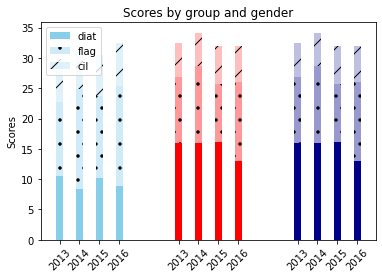

In [7]:
fig, ax = plt.subplots()
width = 0.35   

diat_means = FY_diat_CSoG
flag_means = FY_flag_CSoG
cil_means = FY_cil_CSoG

x = np.arange(4)
ax.bar(x, diat_means, width, label='diat',color = 'skyblue', alpha = 1)
ax.bar(x, flag_means, width, bottom=diat_means,
       label='flag', color = 'skyblue', hatch='.', alpha = 0.4)
ax.bar(x, cil_means, width, bottom=flag_means+diat_means, color = 'skyblue', alpha = 0.25, 
       hatch = '/', label='cil')

###
diat_means = FY_diat_NSoG
flag_means = FY_flag_NSoG
cil_means = FY_cil_NSoG
x2 = np.array([6,7,8,9])

ax.bar(x2, diat_means, width, color = 'red', alpha = 1)
ax.bar(x2, flag_means, width, bottom=diat_means, color = 'red', hatch='.', alpha = 0.4)
ax.bar(x2, cil_means, width, bottom=flag_means+diat_means, color = 'red', alpha = 0.25, 
       hatch = '/')

x3 = np.array([12,13,14,15])

diat_means = FY_diat_JdF
flag_means = FY_flag_JdF
cil_means = FY_cil_JdF

ax.bar(x3, diat_means, width, color = 'darkblue', alpha = 1)
ax.bar(x3, flag_means, width, bottom=diat_means,
       color = 'darkblue', hatch='.', alpha = 0.4)
ax.bar(x3, cil_means, width, bottom=flag_means+diat_means, color = 'darkblue', alpha = 0.25, 
       hatch = '/')

ax.set_xticks([0,1,2,3,6,7,8,9,12,13,14,15])
ax.set_xticklabels(['2013','2014','2015','2016','2013','2014','2015','2016','2013','2014','2015','2016'],rotation = 45)


ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

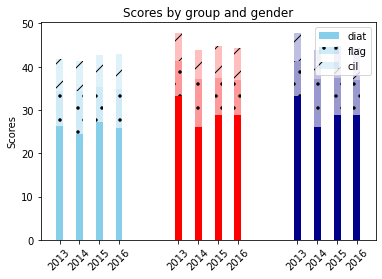

In [8]:
fig, ax = plt.subplots()
width = 0.35   

diat_means = SPR_diat_CSoG
flag_means = SPR_flag_CSoG
cil_means = SPR_cil_CSoG

x = np.arange(4)
ax.bar(x, diat_means, width, label='diat',color = 'skyblue', alpha = 1)
ax.bar(x, flag_means, width, bottom=diat_means,
       label='flag', color = 'skyblue', hatch='.', alpha = 0.4)
ax.bar(x, cil_means, width, bottom=flag_means+diat_means, color = 'skyblue', alpha = 0.25, 
       hatch = '/', label='cil')

###
diat_means = SPR_diat_NSoG
flag_means = SPR_flag_NSoG
cil_means = SPR_cil_NSoG
x2 = np.array([6,7,8,9])

ax.bar(x2, diat_means, width, color = 'red', alpha = 1)
ax.bar(x2, flag_means, width, bottom=diat_means, color = 'red', hatch='.', alpha = 0.4)
ax.bar(x2, cil_means, width, bottom=flag_means+diat_means, color = 'red', alpha = 0.25, 
       hatch = '/')

x3 = np.array([12,13,14,15])

diat_means = SPR_diat_JdF
flag_means = SPR_flag_JdF
cil_means = SPR_cil_JdF

ax.bar(x3, diat_means, width, color = 'darkblue', alpha = 1)
ax.bar(x3, flag_means, width, bottom=diat_means,
       color = 'darkblue', hatch='.', alpha = 0.4)
ax.bar(x3, cil_means, width, bottom=flag_means+diat_means, color = 'darkblue', alpha = 0.25, 
       hatch = '/')

ax.set_xticks([0,1,2,3,6,7,8,9,12,13,14,15])
ax.set_xticklabels(['2013','2014','2015','2016','2013','2014','2015','2016','2013','2014','2015','2016'],rotation = 45)


ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

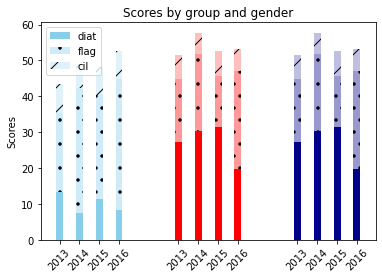

In [9]:
fig, ax = plt.subplots()
width = 0.35   

diat_means = SUM_diat_CSoG
flag_means = SUM_flag_CSoG
cil_means = SUM_cil_CSoG

x = np.arange(4)
ax.bar(x, diat_means, width, label='diat',color = 'skyblue', alpha = 1)
ax.bar(x, flag_means, width, bottom=diat_means,
       label='flag', color = 'skyblue', hatch='.', alpha = 0.4)
ax.bar(x, cil_means, width, bottom=flag_means+diat_means, color = 'skyblue', alpha = 0.25, 
       hatch = '/', label='cil')

###
diat_means = SUM_diat_NSoG
flag_means = SUM_flag_NSoG
cil_means = SUM_cil_NSoG
x2 = np.array([6,7,8,9])

ax.bar(x2, diat_means, width, color = 'red', alpha = 1)
ax.bar(x2, flag_means, width, bottom=diat_means, color = 'red', hatch='.', alpha = 0.4)
ax.bar(x2, cil_means, width, bottom=flag_means+diat_means, color = 'red', alpha = 0.25, 
       hatch = '/')

x3 = np.array([12,13,14,15])

diat_means = SUM_diat_JdF
flag_means = SUM_flag_JdF
cil_means = SUM_cil_JdF

ax.bar(x3, diat_means, width, color = 'darkblue', alpha = 1)
ax.bar(x3, flag_means, width, bottom=diat_means,
       color = 'darkblue', hatch='.', alpha = 0.4)
ax.bar(x3, cil_means, width, bottom=flag_means+diat_means, color = 'darkblue', alpha = 0.25, 
       hatch = '/')

ax.set_xticks([0,1,2,3,6,7,8,9,12,13,14,15])
ax.set_xticklabels(['2013','2014','2015','2016','2013','2014','2015','2016','2013','2014','2015','2016'],rotation = 45)


ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

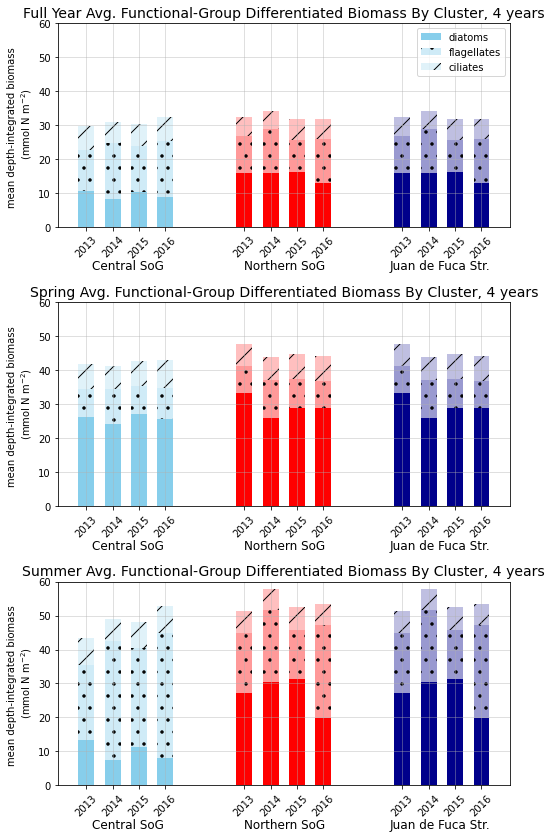

In [61]:
fact = 0.9
fig, axs = plt.subplots(3,1, figsize=(9*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
width = 0.6
do_fy()
do_spr()
do_sum()
axs[0].legend(bbox_to_anchor = [1 ,1])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.37, wspace=0.4)

tits = ['Full Year Avg. Functional-Group Differentiated Biomass By Cluster, 4 years',\
        'Spring Avg. Functional-Group Differentiated Biomass By Cluster, 4 years', \
        'Summer Avg. Functional-Group Differentiated Biomass By Cluster, 4 years']
for i in range(0,3):
    axs[i].grid(':', alpha = 0.5)
    axs[i].set_ylim([0,60])
    axs[i].text(0.2, -12.5, 'Central SoG', fontsize = 12)
    axs[i].text(6, -12.5, 'Northern SoG', fontsize = 12)
    axs[i].text(11.5, -12.5, 'Juan de Fuca Str.', fontsize = 12)
    axs[i].set_ylabel('mean depth-integrated biomass \n (mmol N m$^{-2}$)')
    axs[i].set_title(tits[i], fontsize = 14)

In [44]:
def do_fy():
    diat_means = FY_diat_CSoG
    flag_means = FY_flag_CSoG
    cil_means = FY_cil_CSoG

    x = np.arange(4)
    axs[0].bar(x, diat_means, width, label='diatoms',color = 'skyblue', alpha = 1)
    axs[0].bar(x, flag_means, width, bottom=diat_means,
           label='flagellates', color = 'skyblue', hatch='.', alpha = 0.4)
    axs[0].bar(x, cil_means, width, bottom=flag_means+diat_means, color = 'skyblue', alpha = 0.25, 
           hatch = '/', label='ciliates')

    ###
    diat_means = FY_diat_NSoG
    flag_means = FY_flag_NSoG
    cil_means = FY_cil_NSoG
    x2 = np.array([6,7,8,9])

    axs[0].bar(x2, diat_means, width, color = 'red', alpha = 1)
    axs[0].bar(x2, flag_means, width, bottom=diat_means, color = 'red', hatch='.', alpha = 0.4)
    axs[0].bar(x2, cil_means, width, bottom=flag_means+diat_means, color = 'red', alpha = 0.25, 
           hatch = '/')

    x3 = np.array([12,13,14,15])

    diat_means = FY_diat_JdF
    flag_means = FY_flag_JdF
    cil_means = FY_cil_JdF

    axs[0].bar(x3, diat_means, width, color = 'darkblue', alpha = 1)
    axs[0].bar(x3, flag_means, width, bottom=diat_means,
           color = 'darkblue', hatch='.', alpha = 0.4)
    axs[0].bar(x3, cil_means, width, bottom=flag_means+diat_means, color = 'darkblue', alpha = 0.25, 
           hatch = '/')

    axs[0].set_xticks([0,1,2,3,6,7,8,9,12,13,14,15])
    axs[0].set_xticklabels(['2013','2014','2015','2016','2013','2014','2015','2016','2013','2014','2015','2016'],rotation = 45)


In [12]:
def do_spr():
    diat_means = SPR_diat_CSoG
    flag_means = SPR_flag_CSoG
    cil_means = SPR_cil_CSoG

    x = np.arange(4)
    axs[1].bar(x, diat_means, width, label='diat',color = 'skyblue', alpha = 1)
    axs[1].bar(x, flag_means, width, bottom=diat_means,
           label='flag', color = 'skyblue', hatch='.', alpha = 0.4)
    axs[1].bar(x, cil_means, width, bottom=flag_means+diat_means, color = 'skyblue', alpha = 0.25, 
           hatch = '/', label='cil')

    ###
    diat_means = SPR_diat_NSoG
    flag_means = SPR_flag_NSoG
    cil_means = SPR_cil_NSoG
    x2 = np.array([6,7,8,9])

    axs[1].bar(x2, diat_means, width, color = 'red', alpha = 1)
    axs[1].bar(x2, flag_means, width, bottom=diat_means, color = 'red', hatch='.', alpha = 0.4)
    axs[1].bar(x2, cil_means, width, bottom=flag_means+diat_means, color = 'red', alpha = 0.25, 
           hatch = '/')

    x3 = np.array([12,13,14,15])

    diat_means = SPR_diat_JdF
    flag_means = SPR_flag_JdF
    cil_means = SPR_cil_JdF

    axs[1].bar(x3, diat_means, width, color = 'darkblue', alpha = 1)
    axs[1].bar(x3, flag_means, width, bottom=diat_means,
           color = 'darkblue', hatch='.', alpha = 0.4)
    axs[1].bar(x3, cil_means, width, bottom=flag_means+diat_means, color = 'darkblue', alpha = 0.25, 
           hatch = '/')

    axs[1].set_xticks([0,1,2,3,6,7,8,9,12,13,14,15])
    axs[1].set_xticklabels(['2013','2014','2015','2016','2013','2014','2015','2016','2013','2014','2015','2016'],rotation = 45)


In [13]:
def do_sum():
    diat_means = SUM_diat_CSoG
    flag_means = SUM_flag_CSoG
    cil_means = SUM_cil_CSoG

    x = np.arange(4)
    axs[2].bar(x, diat_means, width, label='diat',color = 'skyblue', alpha = 1)
    axs[2].bar(x, flag_means, width, bottom=diat_means,
           label='flag', color = 'skyblue', hatch='.', alpha = 0.4)
    axs[2].bar(x, cil_means, width, bottom=flag_means+diat_means, color = 'skyblue', alpha = 0.25, 
           hatch = '/', label='cil')

    ###
    diat_means = SUM_diat_NSoG
    flag_means = SUM_flag_NSoG
    cil_means = SUM_cil_NSoG
    x2 = np.array([6,7,8,9])

    axs[2].bar(x2, diat_means, width, color = 'red', alpha = 1)
    axs[2].bar(x2, flag_means, width, bottom=diat_means, color = 'red', hatch='.', alpha = 0.4)
    axs[2].bar(x2, cil_means, width, bottom=flag_means+diat_means, color = 'red', alpha = 0.25, 
           hatch = '/')

    x3 = np.array([12,13,14,15])

    diat_means = SUM_diat_JdF
    flag_means = SUM_flag_JdF
    cil_means = SUM_cil_JdF

    axs[2].bar(x3, diat_means, width, color = 'darkblue', alpha = 1)
    axs[2].bar(x3, flag_means, width, bottom=diat_means,
           color = 'darkblue', hatch='.', alpha = 0.4)
    axs[2].bar(x3, cil_means, width, bottom=flag_means+diat_means, color = 'darkblue', alpha = 0.25, 
           hatch = '/')

    axs[2].set_xticks([0,1,2,3,6,7,8,9,12,13,14,15])
    axs[2].set_xticklabels(['2013','2014','2015','2016','2013','2014','2015','2016','2013','2014','2015','2016'],rotation = 45)
